# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


In [3]:
cities

['tolanaro',
 'revda',
 'longyearbyen',
 'bratsk',
 'tiksi',
 'invercargill',
 'tobruk',
 'ushuaia',
 'albany',
 'cable beach',
 'isafjordur',
 'umm kaddadah',
 'kurmuk',
 'punta arenas',
 'gamboula',
 'nagqu',
 'adamstown',
 'puerto ayora',
 'preobrazheniye',
 'barra de santo antonio',
 'port mathurin',
 'bulgan',
 'ribeira grande',
 'puerto natales',
 'nova sintra',
 'taiohae',
 'grytviken',
 'broken hill',
 'kodiak',
 'lorengau',
 "nar'yan-mar",
 'jalqani',
 'polyarnyy',
 'edinburgh of the seven seas',
 'blackmans bay',
 'wajir',
 'bethel',
 'newman',
 'udachny',
 'rundu',
 'aegina',
 'iqaluit',
 'hawaiian paradise park',
 'chipata',
 'thompson',
 'enewetak',
 'christchurch',
 'zonguldak',
 'polykastro',
 'riolandia',
 'jayapura',
 'freetown',
 'berlin',
 'hamilton',
 'caxias',
 'ust-nera',
 'aasiaat',
 'whitehorse',
 'iskateley',
 'ancud',
 'fale old settlement',
 'waitangi',
 'skutskar',
 'richards bay',
 'west island',
 'lampang',
 'ta`u',
 'vila franca do campo',
 'haiku-pauwela

In [4]:
city = 'pisco'
url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
type(url)

str

In [5]:
response = requests.get(url).json()
response

{'coord': {'lon': -76.2167, 'lat': -13.7},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 73.45,
  'feels_like': 73.92,
  'temp_min': 72.01,
  'temp_max': 73.45,
  'pressure': 1013,
  'humidity': 73},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 260},
 'clouds': {'all': 0},
 'dt': 1700590454,
 'sys': {'type': 1,
  'id': 8691,
  'country': 'PE',
  'sunrise': 1700562418,
  'sunset': 1700608485},
 'timezone': -18000,
 'id': 3932145,
 'name': 'Pisco',
 'cod': 200}

In [6]:
city_lat = response['coord']['lat']
city_lng = response['coord']['lon']
city_max_temp = response['main']['temp_max']
city_humidity = response['main']['humidity']
city_clouds = response['clouds']['all']
city_wind = response['wind']['speed']
city_country = response['sys']['country']
city_date = response['dt']

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather?q={cities}&appid={weather_api_key}&units=imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
    
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tolanaro
Processing Record 2 of Set 1 | revda
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | bratsk
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | invercargill
Processing Record 7 of Set 1 | tobruk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | cable beach
City not found. Skipping...
Processing Record 11 of Set 1 | isafjordur
Processing Record 12 of Set 1 | umm kaddadah
Processing Record 13 of Set 1 | kurmuk
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | gamboula
Processing Record 16 of Set 1 | nagqu
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | preobrazheniye
Processing Record 20 of Set 1 | barra de santo antonio
Processing Record 21 of Set 1 | port mathurin
Processing Record 22 of Set

Processing Record 38 of Set 4 | sechura
Processing Record 39 of Set 4 | flin flon
Processing Record 40 of Set 4 | viedma
Processing Record 41 of Set 4 | luganville
Processing Record 42 of Set 4 | kalmunai
Processing Record 43 of Set 4 | severo-yeniseyskiy
Processing Record 44 of Set 4 | sao joao da barra
Processing Record 45 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 46 of Set 4 | jaffa
Processing Record 47 of Set 4 | qaqortoq
Processing Record 48 of Set 4 | pana
Processing Record 49 of Set 4 | newton
Processing Record 0 of Set 5 | zaragoza
Processing Record 1 of Set 5 | tshabong
Processing Record 2 of Set 5 | crane
Processing Record 3 of Set 5 | chibougamau
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | al burayqah
Processing Record 6 of Set 5 | port saint john's
Processing Record 7 of Set 5 | kuta
Processing Record 8 of Set 5 | papao
Processing Record 9 of Set 5 | ishigaki
Processing Record 10 of Set 5 | bilibino
Processing Record 11 

Processing Record 27 of Set 8 | baiti
Processing Record 28 of Set 8 | alba
Processing Record 29 of Set 8 | chengdu
Processing Record 30 of Set 8 | hirara
Processing Record 31 of Set 8 | xinyuan
Processing Record 32 of Set 8 | melfi
Processing Record 33 of Set 8 | ascension
Processing Record 34 of Set 8 | muzayri'
City not found. Skipping...
Processing Record 35 of Set 8 | tres arroyos
Processing Record 36 of Set 8 | tromso
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | campoverde
Processing Record 39 of Set 8 | ankazoabo
Processing Record 40 of Set 8 | baishan
Processing Record 41 of Set 8 | qujing
Processing Record 42 of Set 8 | novyy urgal
Processing Record 43 of Set 8 | huarmey
Processing Record 44 of Set 8 | benesov
Processing Record 45 of Set 8 | dzhetygara
Processing Record 46 of Set 8 | souillac
Processing Record 47 of Set 8 | chegdomyn
Processing Record 48 of Set 8 | vilyuysk
Processing Record 49 of Set 8 | uyuni
Processing Record 0 of Set 9 | masvingo

Processing Record 14 of Set 12 | bodaybo
Processing Record 15 of Set 12 | merida
Processing Record 16 of Set 12 | yaren
Processing Record 17 of Set 12 | walvis bay
Processing Record 18 of Set 12 | pitimbu
Processing Record 19 of Set 12 | sovetskaya gavan'
Processing Record 20 of Set 12 | klyuchi
Processing Record 21 of Set 12 | alamogordo
Processing Record 22 of Set 12 | smithers
Processing Record 23 of Set 12 | oum hadjer
Processing Record 24 of Set 12 | strezhevoy
Processing Record 25 of Set 12 | berastagi
Processing Record 26 of Set 12 | shakiso
Processing Record 27 of Set 12 | pittsburg
Processing Record 28 of Set 12 | okhotsk
Processing Record 29 of Set 12 | rio grande
Processing Record 30 of Set 12 | port shepstone
Processing Record 31 of Set 12 | amga
Processing Record 32 of Set 12 | niafunke
Processing Record 33 of Set 12 | hachinohe
Processing Record 34 of Set 12 | polonnaruwa
Processing Record 35 of Set 12 | morecambe
Processing Record 36 of Set 12 | seferihisar
Processing Re

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,74.70,80,2,19.26,MG,1700590668
1,revda,56.8010,59.9303,25.43,84,100,11.86,RU,1700590668
2,longyearbyen,78.2186,15.6401,35.44,69,75,20.71,SJ,1700590669
3,bratsk,56.1325,101.6142,-4.67,87,100,14.36,RU,1700590669
4,tiksi,71.6872,128.8694,-20.72,100,83,6.38,RU,1700590669


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [11]:
# Read saved data

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,74.70,80,2,19.26,MG,1700590668
1,revda,56.8010,59.9303,25.43,84,100,11.86,RU,1700590668
2,longyearbyen,78.2186,15.6401,35.44,69,75,20.71,SJ,1700590669
3,bratsk,56.1325,101.6142,-4.67,87,100,14.36,RU,1700590669
4,tiksi,71.6872,128.8694,-20.72,100,83,6.38,RU,1700590669


In [12]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
max_temps

0      74.70
1      25.43
2      35.44
3      -4.67
4     -20.72
       ...  
568    89.56
569    67.71
570    42.28
571    64.51
572    10.15
Name: Max Temp, Length: 573, dtype: float64

In [13]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

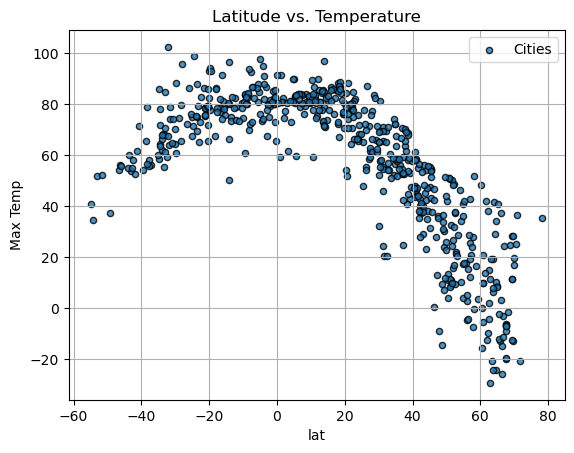

In [14]:
# Build scatter plot for latitude vs. temperature

city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities") 
plt.xlabel('lat')
plt.ylabel('Max Temp')
plt.grid(True)
plt.title('Latitude vs. Temperature')

# Incorporate the other graph properties

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

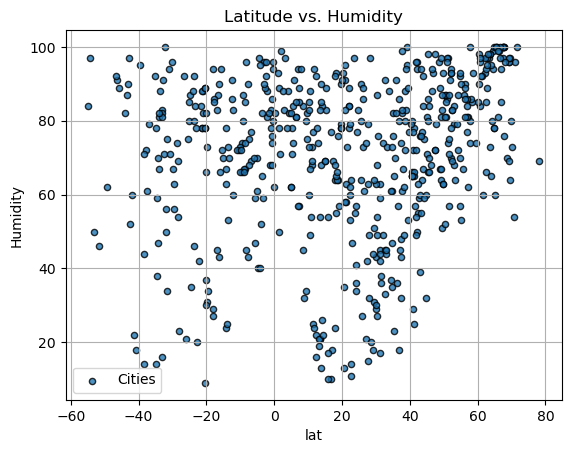

In [15]:
# Build the scatter plots for latitude vs. humidity

# Incorporate the other graph properties

city_data_df.plot.scatter(x = 'Lat', y = 'Humidity',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities") 
plt.xlabel('lat')
plt.ylabel('Humidity')
plt.grid(True)
plt.title('Latitude vs. Humidity')


# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

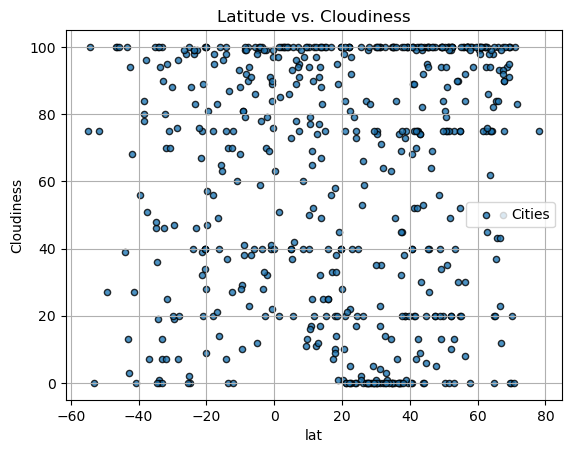

In [16]:
# Build the scatter plots for latitude vs. cloudiness

city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities") 
plt.xlabel('lat')
plt.ylabel('Cloudiness')
plt.grid(True)
plt.title('Latitude vs. Cloudiness')


# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

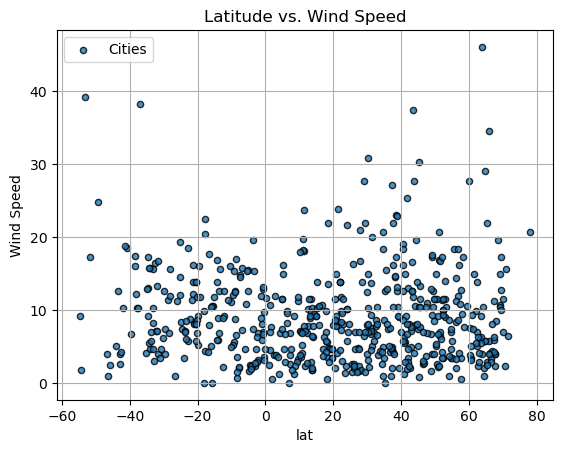

In [17]:
# Build the scatter plots for latitude vs. wind speed

city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities") 
plt.xlabel('lat')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.title('Latitude vs. Wind Speed')


# Incorporate the other graph properties


# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates, graph_title):
    
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.title(graph_title)
    plt.show()

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
North_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
North_Hemisphere_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,revda,56.8010,59.9303,25.43,84,100,11.86,RU,1700590668
2,longyearbyen,78.2186,15.6401,35.44,69,75,20.71,SJ,1700590669
3,bratsk,56.1325,101.6142,-4.67,87,100,14.36,RU,1700590669
4,tiksi,71.6872,128.8694,-20.72,100,83,6.38,RU,1700590669
6,tobruk,32.0836,23.9764,69.44,49,64,6.85,LY,1700590670


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
South_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
South_Hemisphere_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tolanaro,-25.0319,46.9987,74.70,80,2,19.26,MG,1700590668
5,invercargill,-46.4000,168.3500,56.01,91,100,1.01,NZ,1700590670
7,ushuaia,-54.8000,-68.3000,40.62,84,75,9.22,AR,1700590432
12,punta arenas,-53.1500,-70.9167,51.91,50,0,39.12,CL,1700590563
15,adamstown,-25.0660,-130.1015,67.37,85,100,12.03,PN,1700590673


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7606877919785359


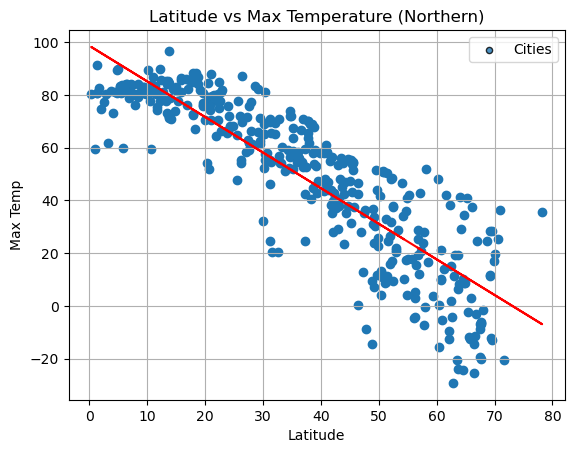

In [47]:
# Linear regression on Northern Hemisphere
#North_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
North_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = North_Hemisphere_city_data_df["Lat"]
max_temps = North_Hemisphere_city_data_df["Max Temp"]
plt.xlabel('lat')
plt.ylabel('Max Temp')
plt.grid(True)
plot_linear_regression(lats, max_temps,'Max Temp',(-30,45),'Latitude vs Max Temperature (Northern)')

The r-value is: 0.43091789939263625


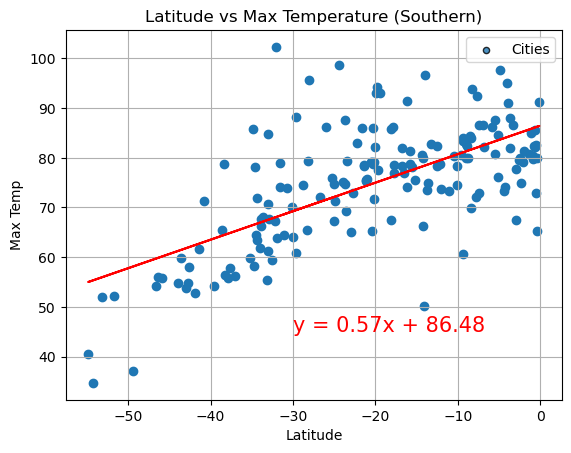

In [48]:
# Linear regression on Southern Hemisphere
#South_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
South_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Max Temp',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = South_Hemisphere_city_data_df["Lat"]
max_temps = South_Hemisphere_city_data_df["Max Temp"]
plt.xlabel('lat')
plt.ylabel('Max Temp')
plt.grid(True)
plot_linear_regression(lats, max_temps,'Max Temp',(-30,45),'Latitude vs Max Temperature (Southern)' )

The linear relationship indicates a positive correlation between a lower Latitude number (closer proximity to the Equator) and temperature for the given cities meaning a slight increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.12167110332645499


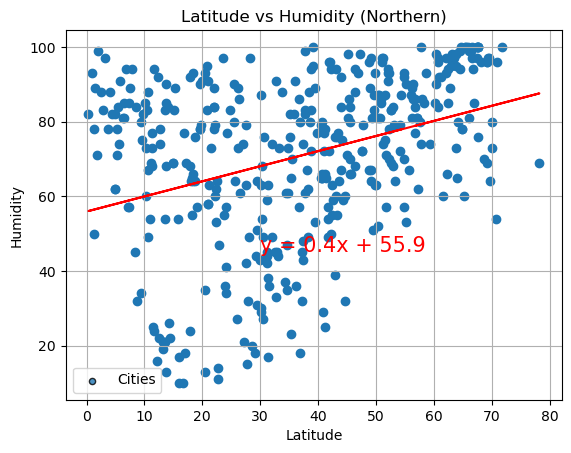

In [51]:
# Northern Hemisphere
#North_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
North_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Humidity',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = North_Hemisphere_city_data_df["Lat"]
Humidity = North_Hemisphere_city_data_df["Humidity"]
plt.xlabel('lat')
plt.ylabel('Humidity')
plt.grid(True)
plot_linear_regression(lats, Humidity,'Humidity',(30,45), 'Latitude vs Humidity (Northern)')

The r-value is: 0.011702463595849701


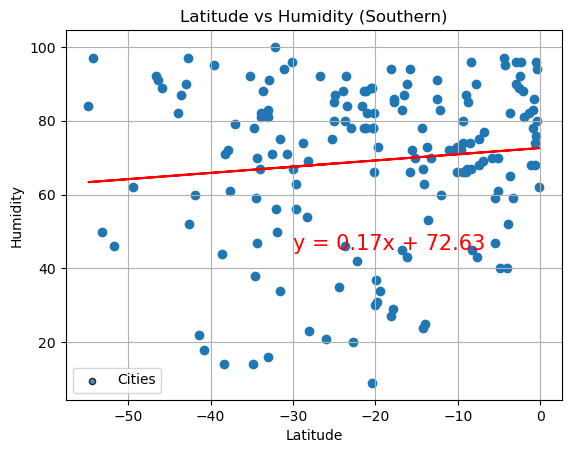

In [52]:
# Southern Hemisphere
#South_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
South_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Humidity',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = South_Hemisphere_city_data_df["Lat"]
Humidity = South_Hemisphere_city_data_df["Humidity"]
plt.xlabel('lat')
plt.ylabel('Humidity')
plt.grid(True)
plot_linear_regression(lats, Humidity,'Humidity',(-30,45),'Latitude vs Humidity (Southern)')

The linear relationship indicates no correlation between a lower Latitude number (closer proximity to the Equator) and humidity for the given cities meaning a insignificant increase.  

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.01843533415296694


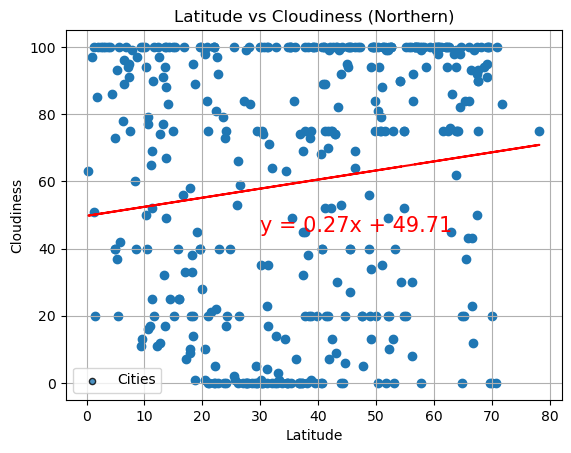

In [54]:
# Northern Hemisphere
#North_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
North_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = North_Hemisphere_city_data_df["Lat"]
Cloudiness = North_Hemisphere_city_data_df["Cloudiness"]
plt.xlabel('lat')
plt.ylabel('Cloudiness')
plt.grid(True)
plot_linear_regression(lats, Cloudiness,'Cloudiness',(30,45),'Latitude vs Cloudiness (Northern)')

The r-value is: 0.017022650214126033


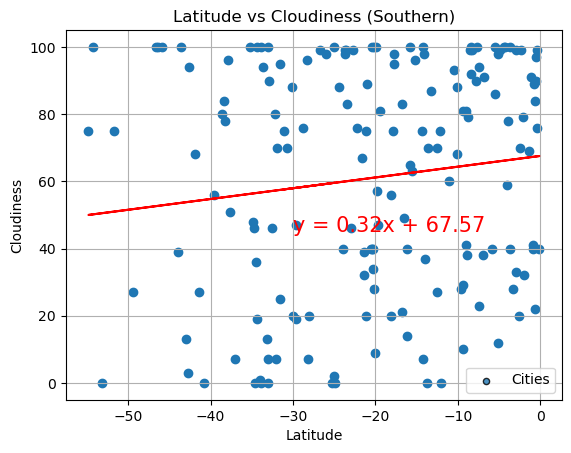

In [55]:
# Southern Hemisphere
#South_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
South_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Cloudiness',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = South_Hemisphere_city_data_df["Lat"]
Cloudiness = South_Hemisphere_city_data_df["Cloudiness"]
plt.xlabel('lat')
plt.ylabel('Cloudiness')
plt.grid(True)
plot_linear_regression(lats, Cloudiness,'Cloudiness',(-30,45),'Latitude vs Cloudiness (Southern)')

The linear relationship indicates no correlation between a lower Latitude number (closer proximity to the Equator) and cloudiness for the given cities meaning an insignificant decrease.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010724769600201287


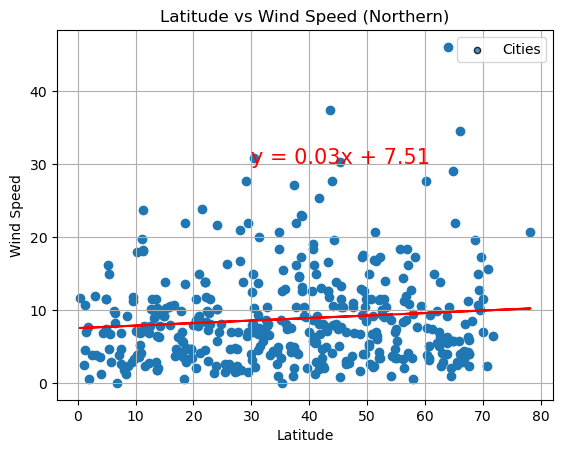

In [57]:
# Northern Hemisphere
#North_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
North_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = North_Hemisphere_city_data_df["Lat"]
Wind_Speed = North_Hemisphere_city_data_df["Wind Speed"]
plt.xlabel('lat')
plt.ylabel('Wind Speed')
plt.grid(True)
plot_linear_regression(lats, Wind_Speed,'Wind Speed',(30,30),'Latitude vs Wind Speed (Northern)')

The r-value is: 0.04032685353633885


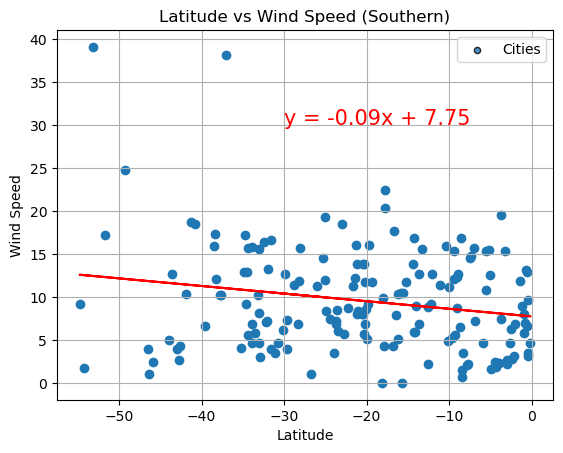

In [59]:
# Southern Hemisphere
#South_Hemisphere_city_data_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
South_Hemisphere_city_data_df.plot.scatter(x = 'Lat', y = 'Wind Speed',edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")
lats = South_Hemisphere_city_data_df["Lat"]
Wind_Speed = South_Hemisphere_city_data_df["Wind Speed"]
plt.xlabel('lat')
plt.ylabel('Wind Speed')
plt.grid(True)
plot_linear_regression(lats, Wind_Speed,'Wind Speed',(-30,30),'Latitude vs Wind Speed (Southern)')

The linear relationship indicates no correlation between a lower Latitude number (closer proximity to the Equator) and cloudiness for the given cities meaning an insignificant decrease.  